#### Khoa Điện tử Viễn thông- Trường Đại học Khoa học tự nhiên<br>
-------------------------------------------------------------------------
# <center>Bài 6: BÀI TẬP XỬ LÝ TÍN HIỆU SỐ </center><br>
Nhóm: <br>
Họ và tên: <br>
MSSV:
#### Mục đích:
> * Thực hành thiết kế lọc số <br>

Thêm thư viện vào project

In [2]:
#Thêm thư viện
import matplotlib.pyplot as plt
from scipy import signal
import numpy as np

#### Bài 1:<br>
Phân tích phổ tính hiệu từ file voice.wav. <br>
> Cho biết âm thanh có bao nhiêu kênh? <br>
> Nhận xét dải tần số của tín hiệu

In [3]:
from scipy.io import  wavfile
fileName = "voice.wav"
fs, s = wavfile.read(fileName)
print(s.size)
f, S = signal.freqz(s, 1, fs = fs)#Khai báo fs trong hàm freqz để chương trình tính f
plt.plot(f,  abs(S))

FileNotFoundError: [Errno 2] No such file or directory: 'voice.wav'

#### Bài 2a:
Phân tích phổ của tín hiệu x sau.
Cho biết đâu là tần số chính đâu là tần số nhiễu (có biên độ nhỏ)

Text(0, 0.5, 'Biên độ')

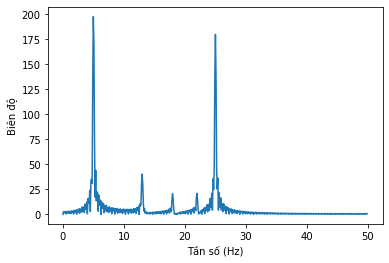

In [21]:
sampleRate = 100 
nyquistRate = sampleRate/2
nSamples = 400 
t = np.arange(nSamples)/sampleRate
x = np.cos(2*np.pi*5*t) + 0.2*np.sin(2*np.pi*13*t+0.1) + \
       0.1*np.sin(2*np.pi*18*t) + 0.1*np.sin(2*np.pi*22*t + 0.1) + \
            0.9*np.sin(2*np.pi*25*t+.8)
w, X = signal.freqz(x, 1)
f, X = signal.freqz(x, 1, fs = sampleRate)
plt.plot(f, abs(X))
plt.xlabel("Tần số (Hz)")
plt.ylabel("Biên độ")

#### Bài 2b:
Thiết kế mạch lọc giữ lại 2 tần số chính của tín hiệu x ở câu 2a

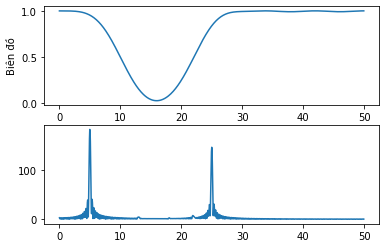

In [22]:
w1 = 10/nyquistRate # Tần số cắt dưới
w2 = 22/nyquistRate # Tần số cắt trên
N = 25
wC = [w1, w2]
b = signal.firwin(N,wC, window='hamming')
w, H = signal.freqz(b, 1)
plt.subplot(2,1,1)
plt.plot(w/np.pi*nyquistRate, abs(H))
plt.xlabel("Tần số Hz")
plt.ylabel("Biên đồ")
y = signal.lfilter(b, 1, x)
w, Y = signal.freqz(y, 1, worN=1024)
plt.subplot(2,1,2)
plt.plot(w/np.pi*nyquistRate, abs(Y))


#### Bài 3a: <br>
Thiết kế và vẽ đáp ứng tần số của bộ lọc FIR với các yêu cầu sau: <br>
> Lọc thấp qua N = 65, fc = 15KHz, của sổ hann <br>

Biết: fs = 44.1KHz

Text(0, 0.5, 'Biên độ')

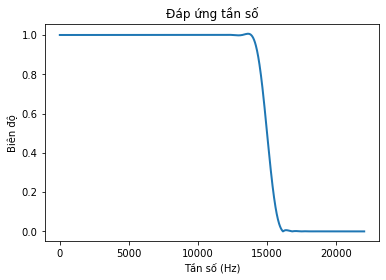

In [23]:
nSamples=400
fs = 44100
nyquistRate = fs/2 
fc =15000
wC = fc/nyquistRate
b=signal.firwin(65,wC,window="hann")
w,H=signal.freqz(b,1,worN=1024)
plt.plot((w/np.pi)*nyquistRate,abs(H),linewidth=2)
plt.title('Đáp ứng tần số') 
plt.xlabel('Tần số (Hz)')
plt.ylabel('Biên độ')

#### Bài 3b: <br>
Thiết kế và vẽ đáp ứng tần số của bộ lọc FIR với các yêu cầu sau: <br>
> Lọc cao qua N = 65, fc = 15KHz, của sổ hamming <br>

Biết: fs = 44.1KHz

Text(0, 0.5, 'Biên độ')

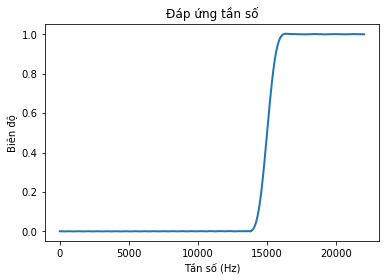

In [24]:
nSamples = 400
fs = 44100
nyquistRate = fs/2 #Tần số Nyquist
fc = 15000 #Hz tần số cắt

wC = fc/nyquistRate # Tần số cắt chuẩn hóa
b = signal.firwin(65, wC, window="hamming",pass_zero=False)
w, H = signal.freqz(b,1, worN=1024)
plt.plot((w/np.pi)*nyquistRate, abs(H), linewidth=2)
plt.title('Đáp ứng tần số') 
plt.xlabel('Tần số (Hz)')
plt.ylabel('Biên độ')


#### Bài 3c: <br>
Thiết kế và vẽ đáp ứng tần số của bộ lọc FIR với các yêu cầu sau: <br>
> Lọc dải qua trong khoảng tần số 4KHz đến 8KHz, N = 23 <br>

Biết: fs = 44.1KHz

Text(0, 0.5, 'Biên độ')

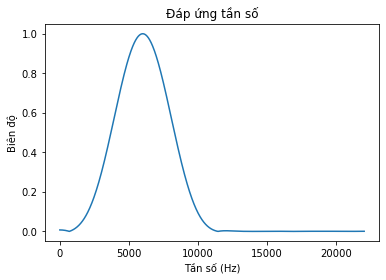

In [25]:
fs = 44100
nyquistRate = fs/2
f1 = 4000
f2= 8000
w1 = f1/nyquistRate
w2 = f2/nyquistRate
wC = [w1 ,w2 ]
b=signal.firwin(23,wC,pass_zero=False)
w, H = signal.freqz(b,1,worN=1024)
plt.plot((w/np.pi)*nyquistRate,abs(H))
plt.title('Đáp ứng tần số') 
plt.xlabel('Tần số (Hz)')
plt.ylabel('Biên độ')

#### Bài 3d: <br>
Thiết kế và vẽ đáp ứng tần số của bộ lọc FIR với các yêu cầu sau: <br>
> Lọc dải chặn từ 12 đến 16KHz, N = 31 <br>

Biết: fs = 44.1KHz

Text(0, 0.5, 'Biên độ')

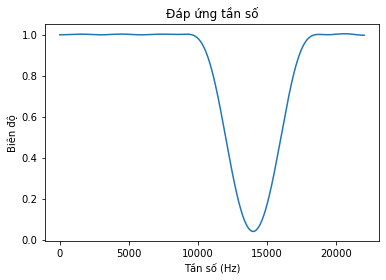

In [26]:
fs = 44100
nyquistRate = fs/2
f1 = 12000
f2= 16000
w1 = f1/nyquistRate
w2 = f2/nyquistRate
wC = [w1 ,w2 ]
b=signal.firwin(31,wC)
w, H = signal.freqz(b,1,worN=1024)
plt.plot((w/np.pi)*nyquistRate,abs(H))
plt.title('Đáp ứng tần số') 
plt.xlabel('Tần số (Hz)')
plt.ylabel('Biên độ')


#### Bài 3e: <br>
Thiết kế và vẽ đáp ứng tần số của bộ lọc FIR với các yêu cầu sau: <br>
> Lọc dải qua 2 band 3-7KHz và 10-15KHz, N = 69

Biết: fs = 44.1KHz

Text(0, 0.5, 'Biên độ')

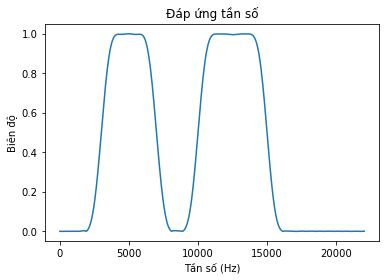

In [27]:
fs = 44100
nyquistRate = fs/2
f1 = 3000
f2= 7000
f3 = 10000
f4 = 15000
w1 = f1/nyquistRate
w2 = f2/nyquistRate
w3 = f3/nyquistRate
w4 = f4/nyquistRate
wC = [w1 ,w2 ,w3 ,w4]
b=signal.firwin(69,wC,window="hamming",pass_zero=False)
w, H = signal.freqz(b,1,worN=1024)
plt.plot((w/np.pi)*nyquistRate,abs(H))
plt.title('Đáp ứng tần số') 
plt.xlabel('Tần số (Hz)')
plt.ylabel('Biên độ')


#### Bài 4a:<br>
Thiết kế và vẽ đáp ứng tần số của mạch lọc IIR Butterworth thấp qua với các thông số sau: <br>
* Tần số cắt 8KHz
* Bậc lọc N = 4

Biết: fs = 44.1KHz

Text(0, 0.5, 'BienDo')

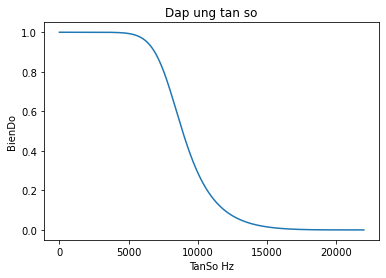

In [28]:
fc = 8000
N = 4
fs = 44100
nyquistRate = fs/2
wC = fc/nyquistRate

b,a = signal.iirfilter(N,wC,rs = 60, btype="lowpass",analog=False,ftype="butter")
w,H = signal.freqz(b,a,worN=512)

plt.plot((w/np.pi)*nyquistRate,abs(H))
plt.title('Dap ung tan so')
plt.xlabel('TanSo Hz')
plt.ylabel('BienDo')

#### Bài 4b: <br>
Thiết kế và vẽ đáp ứng tần số của mạch lọc IIR Chebyshev loại 1 cao qua với các thông số sau: <br>
* Tần số cắt 8KHz
* Bậc lọc N = 4
* rs = 50, rp = 0.5

Biết:fs = 44.1KHz

Text(0, 0.5, 'BienDo')

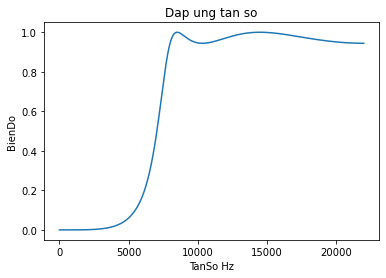

In [29]:
fc = 8000
N = 4
fs = 44100
nyquistRate = fs/2
wC = fc/nyquistRate

b,a = signal.iirfilter(N,wC,rp=0.5,rs=50, btype="highpass",analog=False,ftype="cheby1")
w,H = signal.freqz(b,a,worN=512)

plt.plot((w/np.pi)*nyquistRate,abs(H))
plt.title('Dap ung tan so')
plt.xlabel('TanSo Hz')
plt.ylabel('BienDo')

#### Bài 4c:  <br>
Thiết kế và vẽ đáp ứng tần số của mạch lọc IIR Chebyshev loại 2 dải qua với các thông số sau: <br>
* Tần số cho qua 8-15KHz
* Bậc lọc N = 4
* rs = 50, rp = 0.5

Text(0, 0.5, 'BienDo')

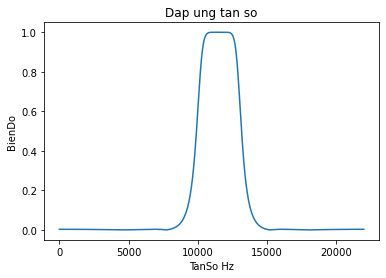

In [30]:
fc1 = 8000
fc2 = 15000
N = 4
fs = 44100
nyquistRate = fs/2
wC1 = fc1/nyquistRate
wC2 = fc2/nyquistRate
wC = [wC1,wC2]

b,a = signal.iirfilter(N,wC,rp=0.5,rs=50, btype="band",analog=False,ftype="cheby2")
w,H = signal.freqz(b,a,worN=1024)

plt.plot((w/np.pi)*nyquistRate,abs(H))
plt.title('Dap ung tan so')
plt.xlabel('TanSo Hz')
plt.ylabel('BienDo')

#### Bài 4d: <br>
Thiết kế và vẽ đáp ứng tần số của mạch lọc IIR Elliptic chặn tần số 60Hz với các thông số sau: <br>
* fs = 8KHz
* Bậc lọc N = 4
* rs = 50, rp = 0.5


(0.0, 100.0)

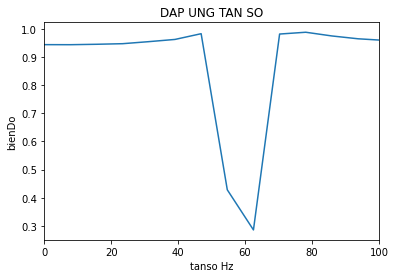

In [39]:
fs = 8000
N=4
f1 = 55
f2 = 65
nyquistRate = fs/2
w1 = f1/nyquistRate
w2 = f2/nyquistRate
wC = [w1,w2]

b,a = signal.iirfilter(N,wC,rp=0.5,rs=50,btype='stop',analog=False,ftype='ellip')
w,H = signal.freqz(b,a,worN=512)
plt.plot((w/np.pi)*nyquistRate,abs(H))
plt.title("DAP UNG TAN SO")
plt.xlabel('tanso Hz')
plt.ylabel('bienDo')
plt.xlim(0,100)

#### Bài 5a: <br>
Thiết kết lọc FIR để loại bỏ tín hiệu 60 Hz trong tín hiệu x sau

(0.0, 1200.0)

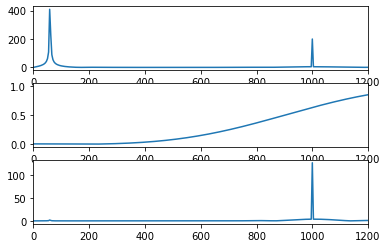

In [45]:
sampleRate = 8000 
nyquistRate = sampleRate/2
nSamples = 2000
t = np.arange(nSamples)/sampleRate
x = 0.5*np.sin(2*np.pi*60*t) + 0.2*np.sin(2*np.pi*1000*t+0.1)
w,X = signal.freqz(x,1,worN=1024)
plt.subplot(3,1,1)
plt.plot((w/np.pi)*nyquistRate,abs(X))
plt.xlim(0,1200)

N = 21
fc = 900
wC = fc/nyquistRate
b = signal.firwin(N,wC,window="hamming",pass_zero=False)
w,H = signal.freqz(b,1,worN=1024)
plt.subplot(3,1,2)
plt.plot((w/np.pi)*nyquistRate,abs(H))
plt.xlim(0,1200)

y = signal.lfilter(b,1,x)
w,Y = signal.freqz(y,1,worN=1024)
plt.subplot(3,1,3)
plt.plot((w/np.pi)*nyquistRate,abs(Y))
plt.xlim(0,1200)


#### Bài 5b: <br>
Thiết kế mạch lọc IIR Butterworth để loại bỏ tín hiệu 60Hz ở bài 5a


(0.0, 1200.0)

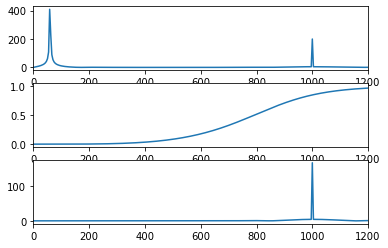

In [47]:
sampleRate = 8000 
nyquistRate = sampleRate/2
nSamples = 2000
t = np.arange(nSamples)/sampleRate
x = 0.5*np.sin(2*np.pi*60*t) + 0.2*np.sin(2*np.pi*1000*t+0.1)
w,X = signal.freqz(x,1,worN=1024)
plt.subplot(3,1,1)
plt.plot((w/np.pi)*nyquistRate,abs(X))
plt.xlim(0,1200)

N = 4
fc = 900
wC = fc/nyquistRate
b,a = signal.iirfilter(N,wC,rp=0.5,rs=60,btype='highpass',analog=False,ftype='butter')
w,H = signal.freqz(b,a,worN=1024)
plt.subplot(3,1,2)
plt.plot((w/np.pi)*nyquistRate,abs(H))
plt.xlim(0,1200)

y = signal.lfilter(b,a,x)
w,Y = signal.freqz(y,1,worN=1024)
plt.subplot(3,1,3)
plt.plot((w/np.pi)*nyquistRate,abs(Y))
plt.xlim(0,1200)


#### Bài 6a: <br>
Thiết kết lọc FIR để loại bỏ tín hiệu 60 Hz trong tín hiệu x sau:

In [32]:
sampleRate = 8000 
nyquistRate = sampleRate/2
nSamples = 2000
t = np.arange(nSamples)/sampleRate
x = 0.4*np.sin(2*np.pi*10*t+0.1) +0.5*np.sin(2*np.pi*60*t) + 0.2*np.sin(2*np.pi*1000*t+0.1)

#### Bài 6b: <br>
Thiết kế mạch lọc IIR Chebyshev loại 1 để loại bỏ tín hiệu 60Hz ở bài 6a

#### Bài 7a: <br>
Thiết kết lọc FIR để giữ lại tần số 60 Hz trong tín hiệu x sau:

In [33]:
sampleRate = 8000 
nyquistRate = sampleRate/2
nSamples = 2000
t = np.arange(nSamples)/sampleRate
x = 0.4*np.sin(2*np.pi*50*t+0.1) +0.5*np.sin(2*np.pi*60*t) + 0.2*np.sin(2*np.pi*800*t+0.1)

#### Bài 7b <br>
Thiết kế mạch lọc IIR Elliptic loại 1 để giữ lại tín hiệu 60Hz ở bài 7a

#### Bài 8a:
Thiết kế mạch lọc FIR để lọc tín hiệu PWM thành tín hiệu hình sin 50Hz


(-1.5, 1.5)

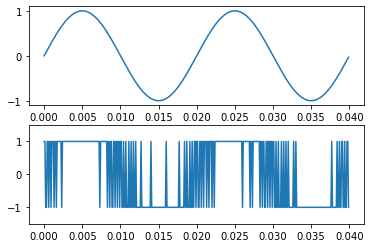

In [34]:
sampleRate = 10000 #Tần số lấy mẫu
nSamples = 400   #Số mẫu
t = np.arange(nSamples)/sampleRate #Khoảng thời gian
sig = np.sin(2 * np.pi *50* t)
f_pwm = 3000
pwm = signal.square(2 * np.pi * f_pwm * t, duty=(sig + 1)/2) #Tín hiệu điều chế độ rộng xung
plt.subplot(2, 1, 1)
plt.plot(t, sig)
plt.subplot(2, 1, 2)
plt.plot(t, pwm)
plt.ylim(-1.5, 1.5)

#### Bài 8b:
Thực hiện lại bài 8a với lọc IIR